# Assignment (5th April) : Decision Trees - 2

## Task:

You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables: 
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float) 
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables. 

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary. 

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting. 

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results. 

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends. 

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

## Solution:

### Import the required Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

### Importing the dataset and examine the variables

In [ ]:
data = pd.read_csv('diabetes.csv')

In [5]:
print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

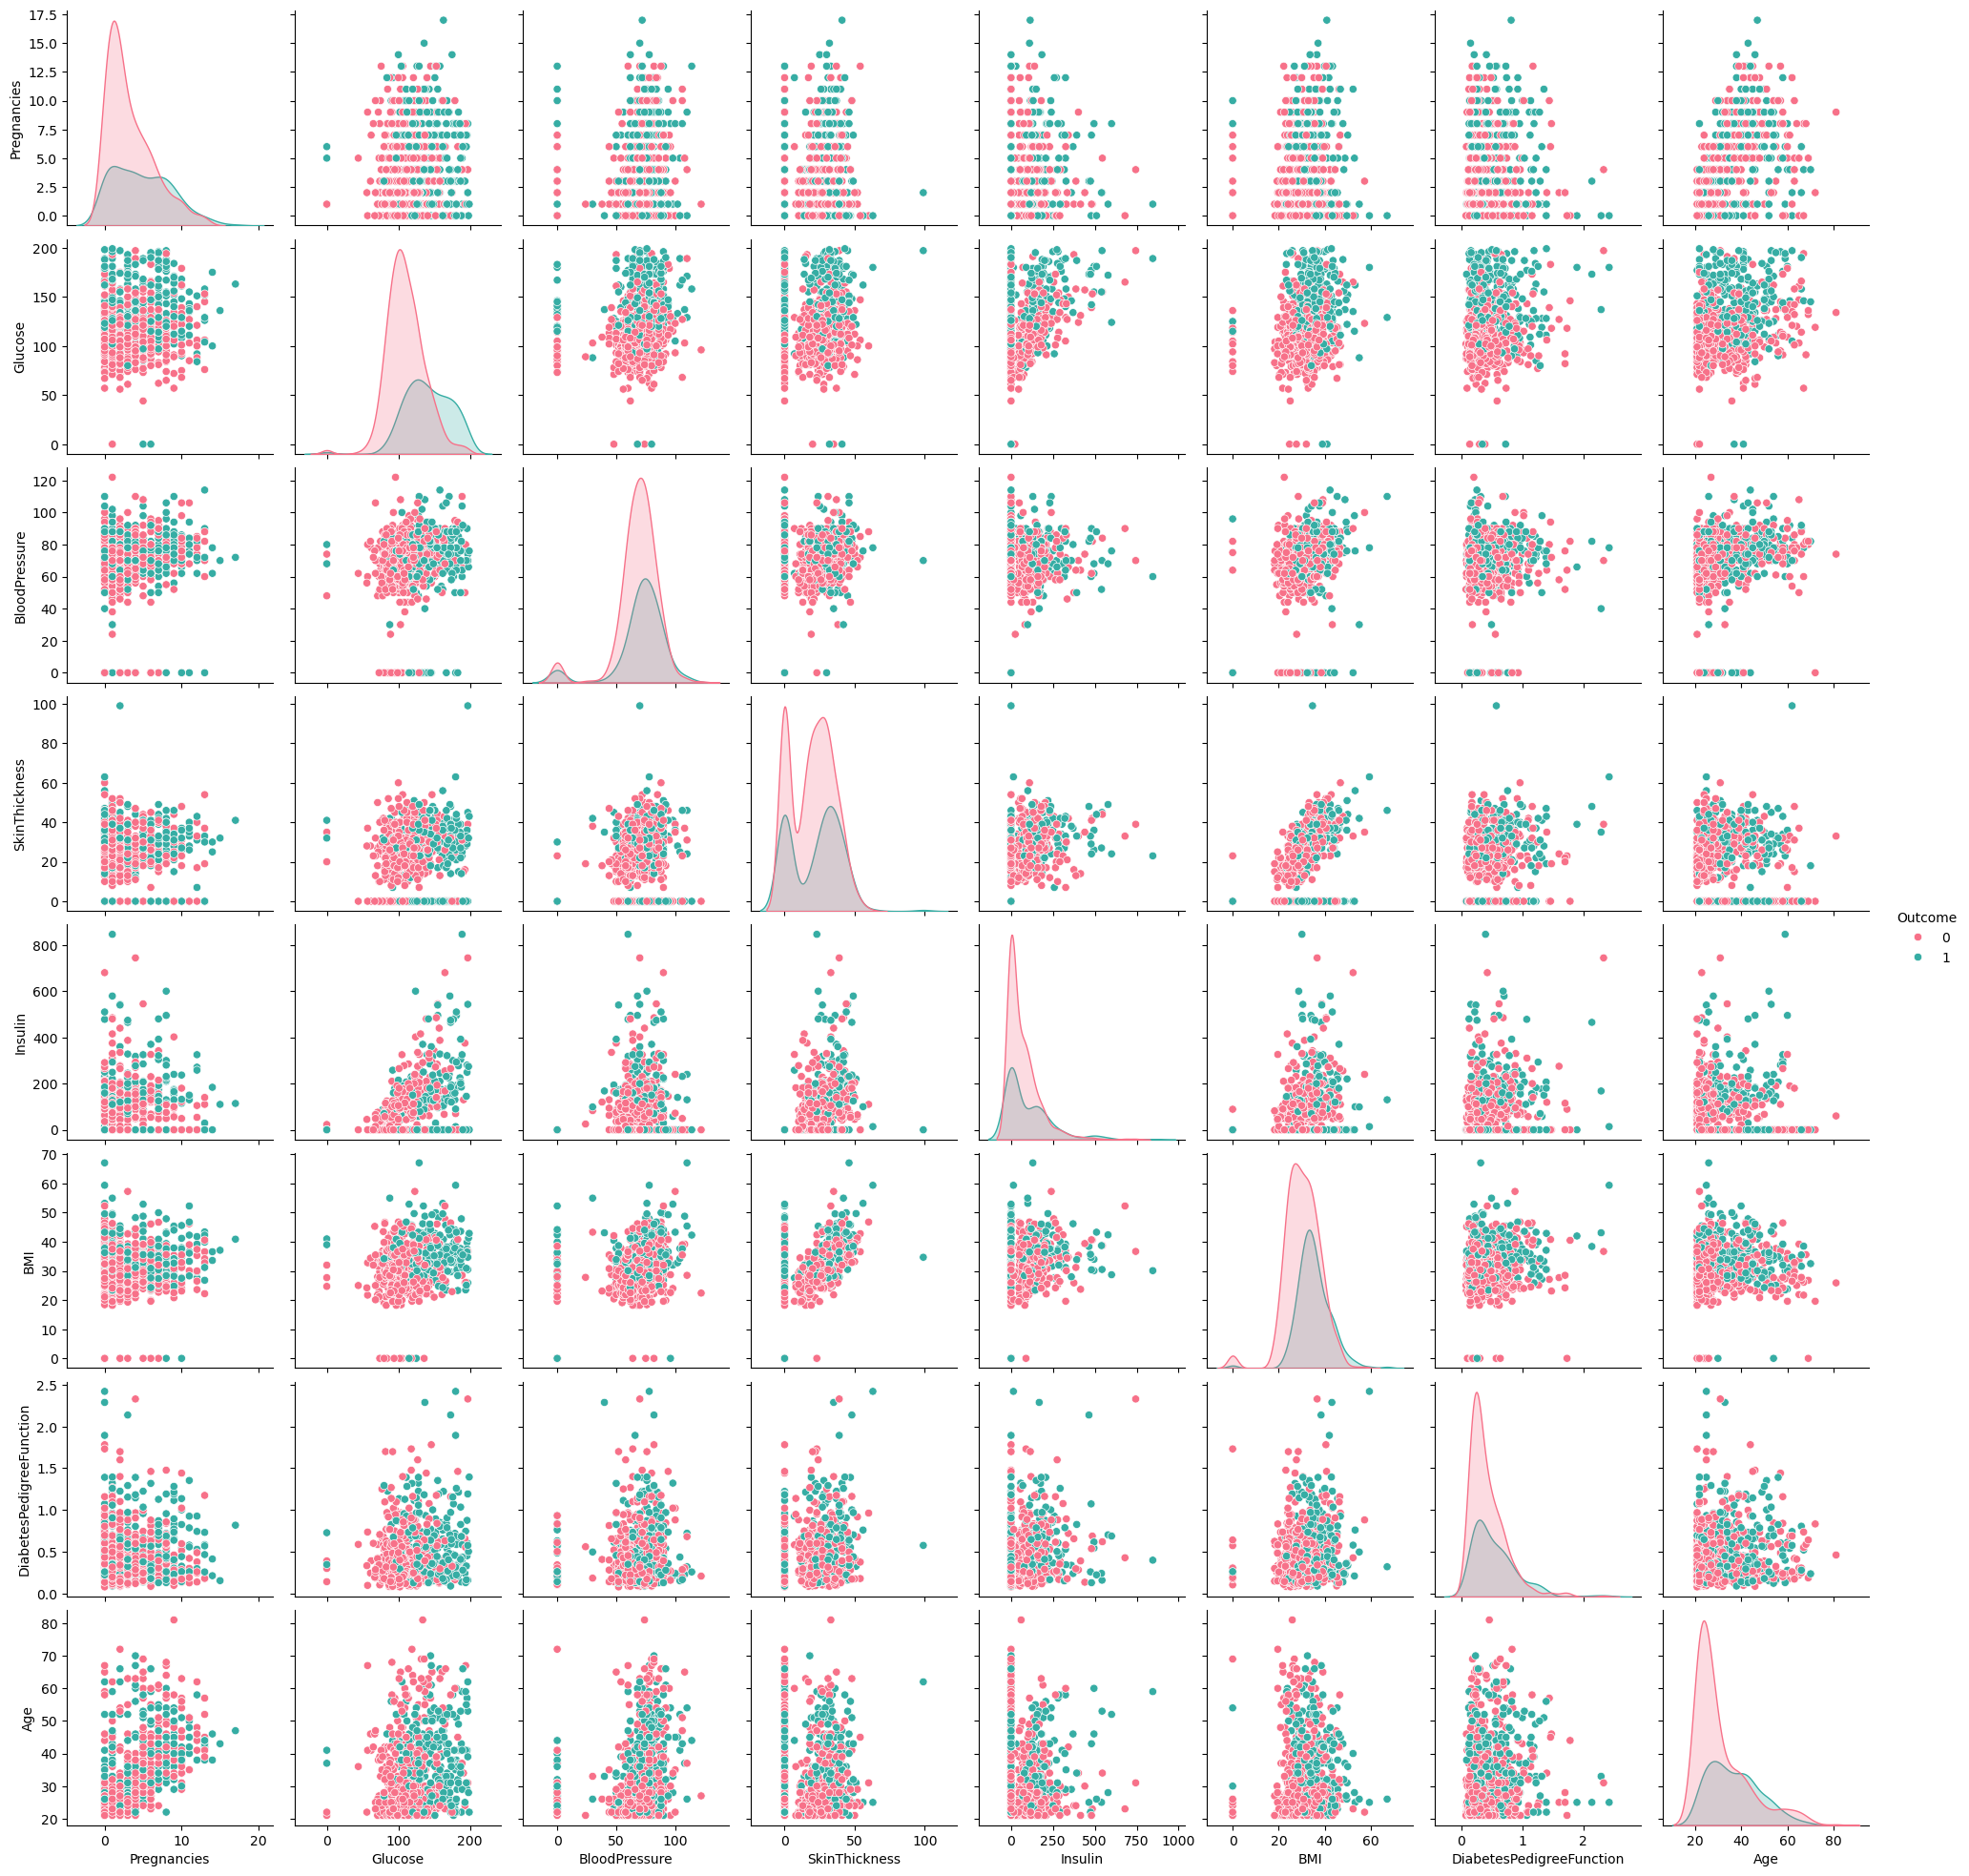

In [7]:
sns.pairplot(data, hue='Outcome', diag_kind="kde", palette="husl")
plt.show()

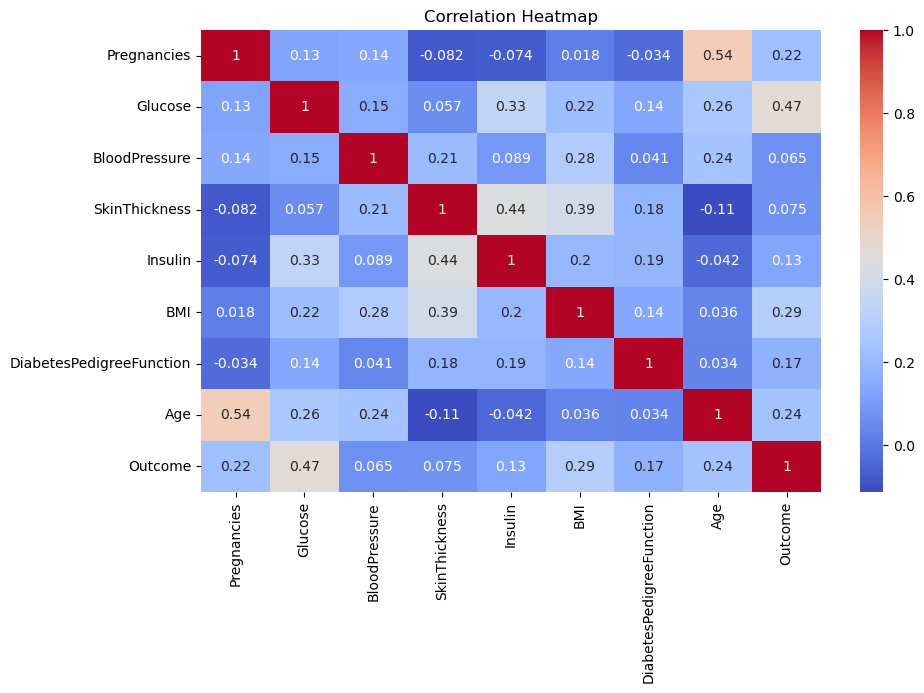

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Preprocess the data

In [9]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [10]:
imputer = SimpleImputer(strategy='median')
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [11]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Split the dataset into training and test sets

In [12]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Decision Tree Model and Optimize Hyperparameters 

In [14]:
dt = DecisionTreeClassifier(random_state=42)

In [15]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [16]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [17]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.7556977209116353


In [18]:
best_dt = grid_search.best_estimator_

### Cross-Validation for Hyperparameter Tuning (ID3/C4.5)

In [ ]:
cv_results = grid_search.cv_results_['mean_test_score']

In [ ]:
print(f"Cross-validated Accuracy: {cv_results.max():.4f}")

Cross-validated Accuracy: 0.7557


### Evaluate Model Performance

In [20]:
y_pred = best_dt.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [22]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7207792207792207
Precision: 0.5833333333333334
Recall: 0.7636363636363637
F1 Score: 0.6614173228346457


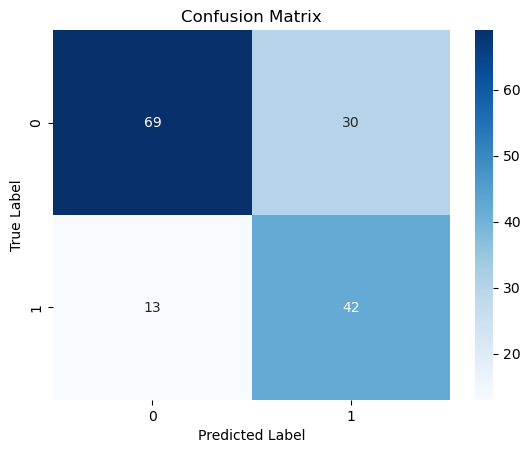

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

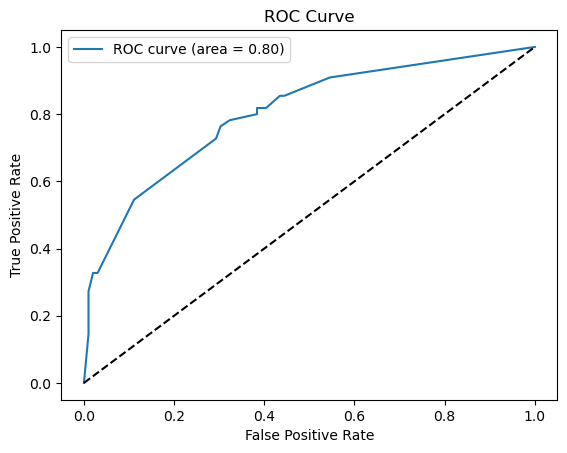

In [25]:
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Interpret the Decision Tree

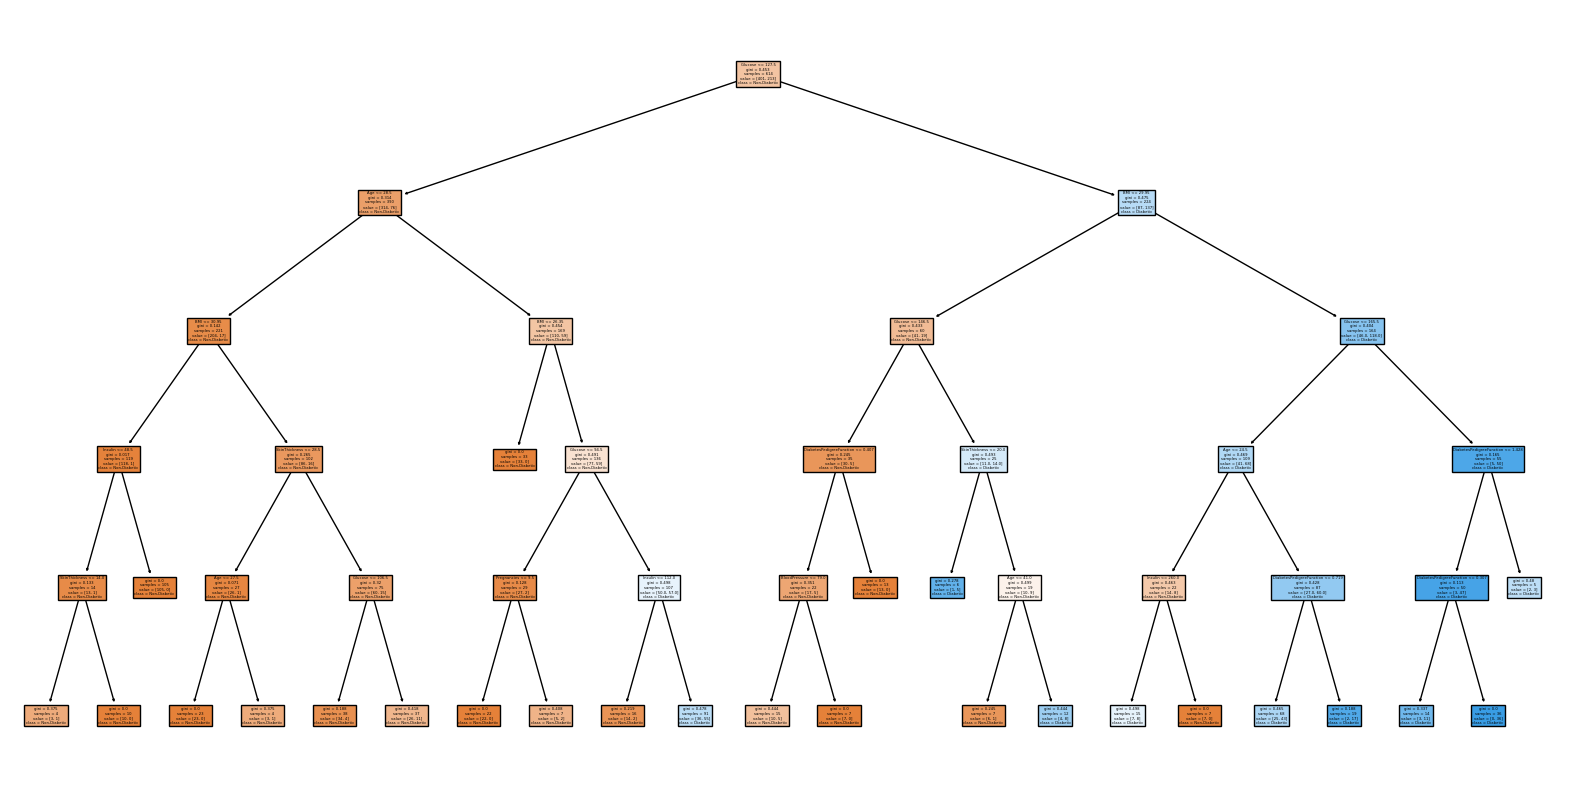

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"], filled=True)
plt.show()

In [27]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_dt.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importances)

Feature Importances:
                     Feature  Importance
1                   Glucose    0.520750
5                       BMI    0.193902
7                       Age    0.151015
4                   Insulin    0.066118
6  DiabetesPedigreeFunction    0.035368
3             SkinThickness    0.018836
2             BloodPressure    0.007710
0               Pregnancies    0.006302


### Validate the Model with Sensitivity Analysis and Scenario Testing

In [28]:
X_test_sensitivity = X_test.copy()
X_test_sensitivity['Glucose'] += np.random.normal(0, 10, X_test.shape[0])
X_test_sensitivity['BMI'] += np.random.normal(0, 2, X_test.shape[0])

In [29]:
y_pred_sensitivity = best_dt.predict(X_test_sensitivity)
sensitivity_accuracy = accuracy_score(y_test, y_pred_sensitivity)

In [30]:
print(f"Sensitivity Analysis - Accuracy with Adjusted Features: {sensitivity_accuracy:.4f}")

Sensitivity Analysis - Accuracy with Adjusted Features: 0.6948


In [31]:
scenario_data = pd.DataFrame({
    'Pregnancies': [1, 3, 0],
    'Glucose': [100, 140, 180],
    'BloodPressure': [70, 80, 90],
    'SkinThickness': [20, 32, 40],
    'Insulin': [85, 130, 250],
    'BMI': [25.0, 35.0, 45.0],
    'DiabetesPedigreeFunction': [0.4, 0.6, 1.2],
    'Age': [30, 45, 60]
})

In [32]:
scenario_predictions = best_dt.predict(scenario_data)
print("Scenario Testing Predictions:", scenario_predictions)

Scenario Testing Predictions: [0 1 1]
